## De-Emojification and User Name Removal

In [22]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 1.3 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install demoji

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
df = pd.read_csv("tweets_with_labels_and_emojis.csv")
df.head(10)

,Tweet,Label
0,Great conversation with @Sina123 today! 😊,1
1,Just finished reading the latest blog post by ...,2
2,@Sunny Thanks for the retweet! 👍,1
3,Excited to meet @Alma in person next week! 🎉,2
4,I'm feeling positive about the project. 💪,1
5,This weather is neither good nor bad. 🌦️,2
6,I'm really disappointed with the service I rec...,3


In [3]:
len(df)

7

In [34]:
import pandas as pd
import demoji
import re

def process_csv(original_csv_path, processed_csv_path):
    # Read the original CSV file into a DataFrame
    df = pd.read_csv(original_csv_path)

    # Function to replace emojis with text
    def replace_emojis(text):
        return demoji.replace_with_desc(text)

    # Function to remove user names
    def remove_usernames(text):
        return re.sub(r'@\w+', '', text)

    # Apply the functions to the 'Tweet' column
    df['Tweet'] = df['Tweet'].apply(replace_emojis).apply(remove_usernames)

    # Save the processed DataFrame to a new CSV file
    df.to_csv(processed_csv_path, index=False)

# Example usage:
original_csv_path = 'tweets_with_labels_and_emojis.csv'
processed_csv_path = 'processed_tweets.csv'

process_csv(original_csv_path, processed_csv_path)


In [15]:
import pandas as pd
df = pd.read_csv("processed_tweets.csv")
df.head()

,Tweet,Label
0,Great conversation with today! :smiling face ...,1
1,Just finished reading the latest blog post by ...,2
2,Thanks for the retweet! :thumbs up:,1
3,Excited to meet in person next week! :party p...,2
4,I'm feeling positive about the project. :flexe...,1


In [16]:
print(df.iloc[0, 0])

Great conversation with  today! :smiling face with smiling eyes:


## Data distribution to Train, Test and Validatiuon

Total Count of Samples =  6218


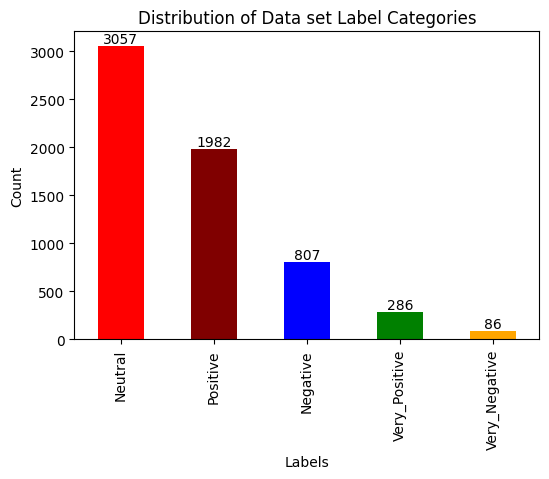

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(df))
label_counts = df['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Data set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [2]:
class_counts = df['label'].value_counts()
print(class_counts)

label
3    3057
2    1982
4     807
1     286
5      86
Name: count, dtype: int64


In [5]:
# Visualization of Class Labels Taining data
df=pd.read_csv('final_labels_2.0.csv')
df.head()

,id,text,label
0,8,Fuck this Transsexual WiFi. It's pain in the a...,3
1,30,asexual satsuki hc? about fuckign time,3
2,35,Nigerian babes are going a wire about sex ting...,3
3,61,"If Bernies out there singing Scalias praises,k...",3
4,79,using 'we're lesbian' every time we're about t...,3


In [6]:
df.rename(columns={'text': 'Text','label': 'Label_Id'}, inplace=True)
df.head()

,id,Text,Label_Id
0,8,Fuck this Transsexual WiFi. It's pain in the a...,3
1,30,asexual satsuki hc? about fuckign time,3
2,35,Nigerian babes are going a wire about sex ting...,3
3,61,"If Bernies out there singing Scalias praises,k...",3
4,79,using 'we're lesbian' every time we're about t...,3


In [11]:
label_mapping = {
    1: 'Very_Positive',
    2: 'Positive',
    3: 'Neutral',
    4: 'Negative',
    5: 'Very_Negative'
}

# Add new column 'Label' based on 'Label_Id'
df['Label'] = df['Label_Id'].map(label_mapping)
df.head()

,id,Text,Label_Id,Label
0,8,Fuck this Transsexual WiFi. It's pain in the a...,3,Neutral
1,30,asexual satsuki hc? about fuckign time,3,Neutral
2,35,Nigerian babes are going a wire about sex ting...,3,Neutral
3,61,"If Bernies out there singing Scalias praises,k...",3,Neutral
4,79,using 'we're lesbian' every time we're about t...,3,Neutral


In [12]:
# Add new column 'Label_Rev' based on 'Label_Id'
df['Label_Rev'] = df['Label_Id'] - 1
df.head()

,id,Text,Label_Id,Label,Label_Rev
0,8,Fuck this Transsexual WiFi. It's pain in the a...,3,Neutral,2
1,30,asexual satsuki hc? about fuckign time,3,Neutral,2
2,35,Nigerian babes are going a wire about sex ting...,3,Neutral,2
3,61,"If Bernies out there singing Scalias praises,k...",3,Neutral,2
4,79,using 'we're lesbian' every time we're about t...,3,Neutral,2


In [13]:
class_counts = df['Label_Rev'].value_counts()
print(class_counts)

Label_Rev
2    3057
1    1982
3     807
0     286
4      86
Name: count, dtype: int64


In [14]:
df.to_csv('final_labels_2.0.csv',index=False)
df.head()

,id,Text,Label_Id,Label,Label_Rev
0,8,Fuck this Transsexual WiFi. It's pain in the a...,3,Neutral,2
1,30,asexual satsuki hc? about fuckign time,3,Neutral,2
2,35,Nigerian babes are going a wire about sex ting...,3,Neutral,2
3,61,"If Bernies out there singing Scalias praises,k...",3,Neutral,2
4,79,using 'we're lesbian' every time we're about t...,3,Neutral,2


### Data distribution in Train, Test and Validation using Stratified sampling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('final_labels_2.0.csv')

# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=42)

# Perform stratified sampling
train_val, test = train_test_split(data_shuffled, test_size=0.15, random_state=42, stratify=data_shuffled['Label'])
train, val = train_test_split(train_val, test_size=0.15/0.85, random_state=42, stratify=train_val['Label'])

# Display the shapes of the sets
print("Training Set shape:", train.shape)
print("Validation Set shape:", val.shape)
print("Testing Set shape:", test.shape)

Training Set shape: (4352, 5)
Validation Set shape: (933, 5)
Testing Set shape: (933, 5)


### Analysis of Train Datasets

Total Count of Samples =  4352


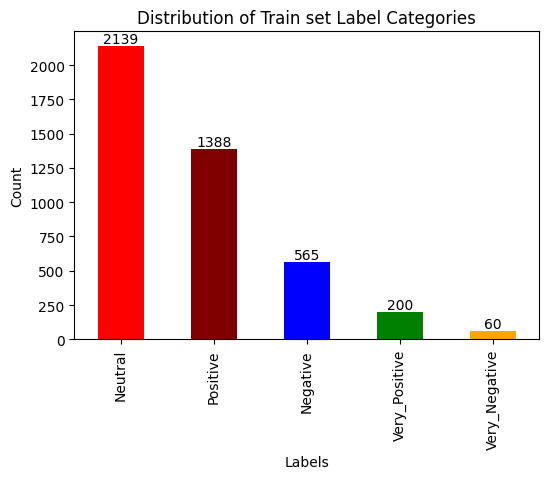

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(train))
label_counts = train['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Train set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [3]:
# Calculate class counts
class_counts = train['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")


Class Neutral: Count: 2139, Percentage Contribution: 49.15%
Class Positive: Count: 1388, Percentage Contribution: 31.89%
Class Negative: Count: 565, Percentage Contribution: 12.98%
Class Very_Positive: Count: 200, Percentage Contribution: 4.60%
Class Very_Negative: Count: 60, Percentage Contribution: 1.38%


In [4]:
train.to_csv("HSP_Train_Data_with_Encoded_Label_2.0.csv",index=False)

### Analysis of Validation datasets

Total Count of Samples =  933


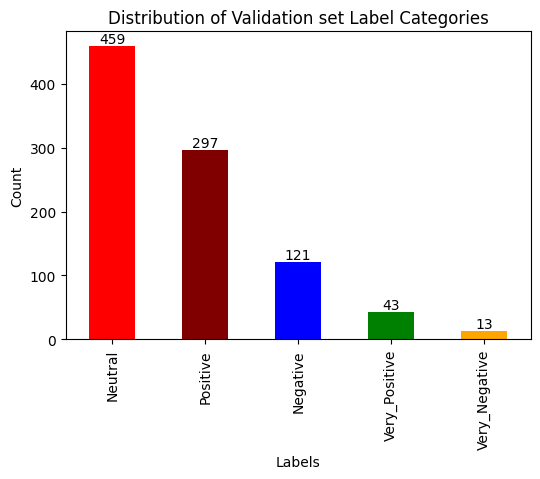

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(val))
label_counts = val['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Validation set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [6]:
# Calculate class counts
class_counts = val['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Neutral: Count: 459, Percentage Contribution: 49.20%
Class Positive: Count: 297, Percentage Contribution: 31.83%
Class Negative: Count: 121, Percentage Contribution: 12.97%
Class Very_Positive: Count: 43, Percentage Contribution: 4.61%
Class Very_Negative: Count: 13, Percentage Contribution: 1.39%


In [7]:
val.to_csv("HSP_Val_Data_with_Encoded_Label_2.0.csv",index=False)

### Analysis of Test datasets

Total Count of Samples =  933


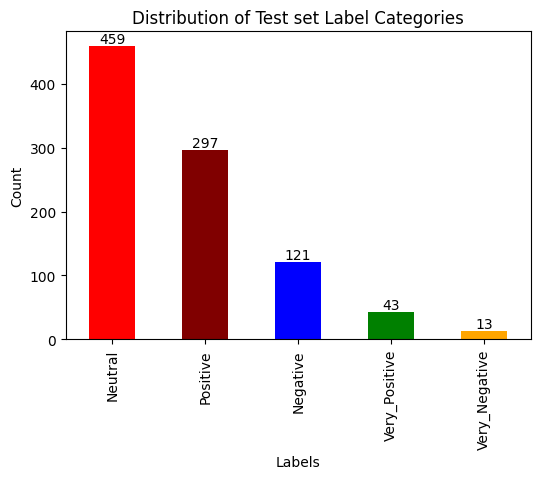

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(test))
label_counts = test['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Test set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [12]:
# Calculate class counts
class_counts = test['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Neutral: Count: 459, Percentage Contribution: 49.20%
Class Positive: Count: 297, Percentage Contribution: 31.83%
Class Negative: Count: 121, Percentage Contribution: 12.97%
Class Very_Positive: Count: 43, Percentage Contribution: 4.61%
Class Very_Negative: Count: 13, Percentage Contribution: 1.39%


In [13]:
test.to_csv("HSP_Test_Data_with_Encoded_Label_2.0.csv",index=False)

## Preprocessing of Revised Datasets (After creating fouth annontation)

In [29]:
import pandas as pd
df = pd.read_csv("final_labels_with_disagreements.csv")
print(len(df))
df.head()

6250


,id,text,annotation_1,annotation_2,annotation_3,annotation_4
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0


### Find the id of records where atleast two annotation are labelled as '6'

In [30]:
import pandas as pd
df1 = pd.read_csv("final_labels_with_any_two_annotation_6.csv")
df1.head(5)

,id,text,annotation_1,annotation_2,annotation_3
0,273,one of the characters was asexual and i fuckin...,3,6,6
1,360,Transgender\nAsexual\nBisexual\nDa Lesbians an...,3,6,6
2,686,"""...and that's wrong (pertaining to a convo ab...",6,6,3
3,693,any furry born after 1993 can’t cook… all they...,6,6,3
4,717,"Coming this November to ABC, a trans gay man a...",6,6,2


In [31]:
# Assuming the column containing IDs is named 'id'
id_list_1 = df1['id'].tolist()
print(id_list_1)

[273, 360, 686, 693, 717, 718, 741, 815, 862, 1466, 1484, 1634, 2152, 2508, 2530, 2573, 2581, 2622, 2646, 2708, 2971, 3012, 3134, 3142, 3156, 3182, 3431, 3432, 3555, 3794, 5747]


In [32]:
import pandas as pd
df2 = pd.read_csv("final_labels_with_all_annotation_6.csv")
df2.head(5)

,id,text,annotation_1,annotation_2,annotation_3
0,3211,trans girl twilight sparkle reading her copy o...,6,6,6


In [33]:
# Assuming the column containing IDs is named 'id'
id_list_2 = df2['id'].tolist()
print(id_list_2)

[3211]


In [34]:
id_list = id_list_1 + id_list_2
print(len(id_list))
print(id_list)

32
[273, 360, 686, 693, 717, 718, 741, 815, 862, 1466, 1484, 1634, 2152, 2508, 2530, 2573, 2581, 2622, 2646, 2708, 2971, 3012, 3134, 3142, 3156, 3182, 3431, 3432, 3555, 3794, 5747, 3211]


### From Revised annotation print all those records where atlesst two annotation are lebelled as 6

In [35]:
# Filter the DataFrame
filtered_df = df[df['id'].isin(id_list)]
print(len(filtered_df))
filtered_df.head(10)

32


,id,text,annotation_1,annotation_2,annotation_3,annotation_4
272,273,one of the characters was asexual and i fuckin...,3,6,6,2
359,360,Transgender\nAsexual\nBisexual\nDa Lesbians an...,3,6,6,2
685,686,"""...and that's wrong (pertaining to a convo ab...",6,6,3,3
692,693,any furry born after 1993 can’t cook… all they...,6,6,3,4
716,717,"Coming this November to ABC, a trans gay man a...",6,6,2,3
717,718,I can't tell if y'all laughing with the gay ni...,6,6,3,4
740,741,Apparently the Trans-Am® isn't as closely rela...,6,6,3,3
814,815,"Crisscrossd H'ney &amp; H'gey tonight,behalf o...",3,6,6,3
861,862,13 year old lesbians see this is why that gay ...,6,3,6,4
1465,1466,[Questionable]\n\nI gey skyward harp in 10 pul...,6,3,6,3


### Calculate the average of labeled annotation

In [36]:
def calculate_avg(row):
    values = [val for val in row if val not in (6, 0)]
    return sum(values) / len(values) if values else None

df['average'] = df[['annotation_1', 'annotation_2', 'annotation_3', 'annotation_4']].apply(calculate_avg, axis=1)
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333


#### Cheack Whether special case records average are calculated or not

In [37]:
# Filter the DataFrame
filtered_df = df[df['id'].isin(id_list)]
print(len(filtered_df))
filtered_df.head(10)

32


,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average
272,273,one of the characters was asexual and i fuckin...,3,6,6,2,2.5
359,360,Transgender\nAsexual\nBisexual\nDa Lesbians an...,3,6,6,2,2.5
685,686,"""...and that's wrong (pertaining to a convo ab...",6,6,3,3,3.0
692,693,any furry born after 1993 can’t cook… all they...,6,6,3,4,3.5
716,717,"Coming this November to ABC, a trans gay man a...",6,6,2,3,2.5
717,718,I can't tell if y'all laughing with the gay ni...,6,6,3,4,3.5
740,741,Apparently the Trans-Am® isn't as closely rela...,6,6,3,3,3.0
814,815,"Crisscrossd H'ney &amp; H'gey tonight,behalf o...",3,6,6,3,3.0
861,862,13 year old lesbians see this is why that gay ...,6,3,6,4,3.5
1465,1466,[Questionable]\n\nI gey skyward harp in 10 pul...,6,3,6,3,3.0


### Round off the average value  

In [38]:
# Round up on .5
df['average_round'] = df['average'].apply(lambda x: round(x + 0.1))
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2


#### Cheack Whether special case records are roud off well or not

In [39]:
filtered_df = df[df['id'].isin(id_list)]
print(len(filtered_df))
filtered_df.head(10)

32


,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round
272,273,one of the characters was asexual and i fuckin...,3,6,6,2,2.5,3
359,360,Transgender\nAsexual\nBisexual\nDa Lesbians an...,3,6,6,2,2.5,3
685,686,"""...and that's wrong (pertaining to a convo ab...",6,6,3,3,3.0,3
692,693,any furry born after 1993 can’t cook… all they...,6,6,3,4,3.5,4
716,717,"Coming this November to ABC, a trans gay man a...",6,6,2,3,2.5,3
717,718,I can't tell if y'all laughing with the gay ni...,6,6,3,4,3.5,4
740,741,Apparently the Trans-Am® isn't as closely rela...,6,6,3,3,3.0,3
814,815,"Crisscrossd H'ney &amp; H'gey tonight,behalf o...",3,6,6,3,3.0,3
861,862,13 year old lesbians see this is why that gay ...,6,3,6,4,3.5,4
1465,1466,[Questionable]\n\nI gey skyward harp in 10 pul...,6,3,6,3,3.0,3


In [41]:
# List of ids to filter
ids_to_fil = [1, 2, 3, 4, 5, 273, 360, 686, 693, 3211 ]
fil_df = df[df['id'].isin(ids_to_fil)]
fil_df.head(10)

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2
272,273,one of the characters was asexual and i fuckin...,3,6,6,2,2.500000,3
359,360,Transgender\nAsexual\nBisexual\nDa Lesbians an...,3,6,6,2,2.500000,3
685,686,"""...and that's wrong (pertaining to a convo ab...",6,6,3,3,3.000000,3
692,693,any furry born after 1993 can’t cook… all they...,6,6,3,4,3.500000,4
3210,3211,trans girl twilight sparkle reading her copy o...,6,6,6,3,3.000000,3


### Assigned the Binary Label to average label

In [270]:
# Applying the condition to assign 'Hate' or 'Non_Hate'
import numpy as np
df['Bin_Label'] = np.where(df['average_round'] > 3, 'Hate', 'Non_Hate')
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate


In [271]:
import numpy as np
# Create the 'Bin_Label_Id' column
df['Bin_Label_Id'] = np.where(df['Bin_Label'] == 'Non_Hate', 1, 2)
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1


In [272]:
df['Rev_Bin_Label_Id'] = df['Bin_Label_Id'] - 1
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0


### Assigned the Multi Label to average label

In [273]:
# Mapping dictionary
label_map = {
    1: 'Very_Positive',
    2: 'Positive',
    3: 'Neutral',
    4: 'Negative',
    5: 'Very_Negative'
}

# Applying the mapping to create the new 'Label' column
df['Multi_Label'] = df['average_round'].map(label_map)

# Display the DataFrame to verify the new column
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id,Multi_Label
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0,Neutral
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0,Neutral
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0,Positive
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive


### Assign Id to Multilabel

In [274]:
df['Multi_Label_Id'] = df['average_round']
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id,Multi_Label,Multi_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0,Neutral,3
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0,Neutral,3
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2


In [275]:
df['Rev_Mult_Label_Id'] = df['Multi_Label_Id'] - 1
df.head()

,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id,Multi_Label,Multi_Label_Id,Rev_Mult_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1


### Analysis of Binary Label

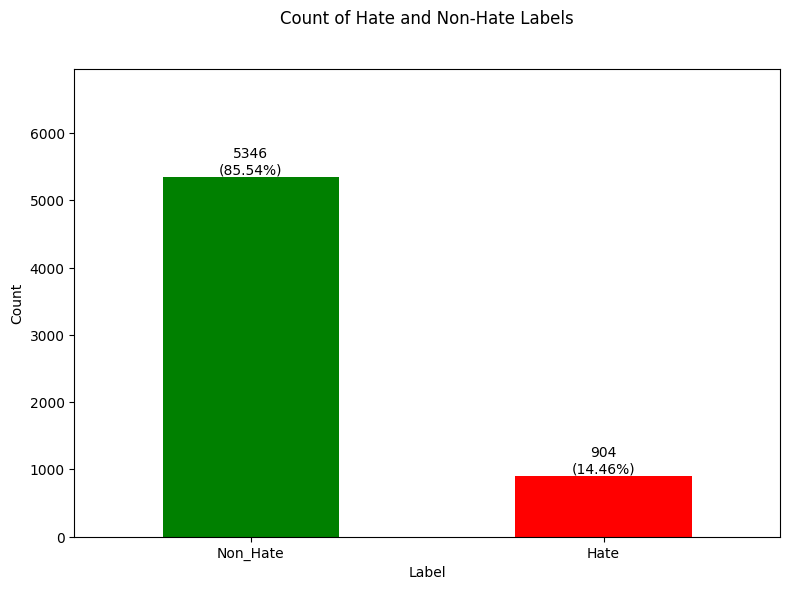

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate count and percentage
counts = df['Bin_Label'].value_counts()
percentages = df['Bin_Label'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))  # Increased figure height from 4 to 6
ax = counts.plot(kind='bar', color=['green', 'red'])
plt.title('Count of Hate and Non-Hate Labels', y=1.08)  # Adjusting title's y-position
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjusting y-axis limit
ax.set_ylim(0, counts.max() + counts.max() * 0.3)  # Adding 30% more space above the highest bar

# Adding text annotations
labels = counts.index  # This captures the correct labels
for idx, label in enumerate(labels):
    count = counts[label]
    percentage = percentages[label]
    ax.text(idx, count + 0.05, f'{int(count)}\n({percentage:.2f}%)', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make room for elements
plt.show()

### Analysis of Multilabel Label

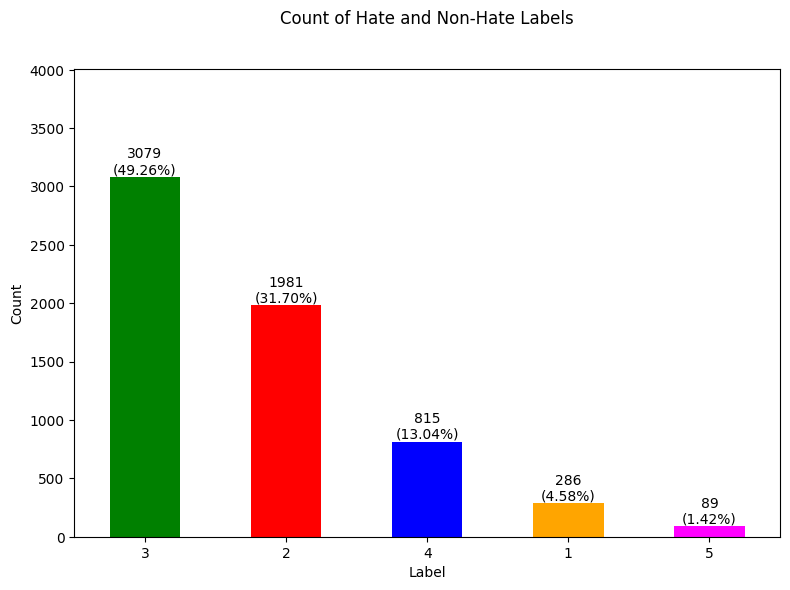

In [278]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate count and percentage
counts = df['average_round'].value_counts()
percentages = df['average_round'].value_counts(normalize=True) * 100

# Plotting
plt.figure(figsize=(8, 6))  # Increased figure height from 4 to 6

ax = counts.plot(kind='bar', color=['green', 'red', 'blue', 'orange', 'magenta'])
plt.title('Count of Labels Category wise', y=1.08)  # Adjusting title's y-position
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Adjusting y-axis limit
ax.set_ylim(0, counts.max() + counts.max() * 0.3)  # Adding 30% more space above the highest bar

# Adding text annotations
labels = counts.index  # This captures the correct labels
for idx, label in enumerate(labels):
    count = counts[label]
    percentage = percentages[label]
    ax.text(idx, count + 0.05, f'{int(count)}\n({percentage:.2f}%)', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to make room for elements
plt.show()

In [279]:
df.to_csv("final_labels_with_disagreements_avg_bin_labels.csv",index=False)

### Demojification and Removal of User name

In [280]:
df = pd.read_csv("final_labels_with_disagreements_avg_bin_labels.csv")
print(len(df))
df.head()

6250


,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id,Multi_Label,Multi_Label_Id,Rev_Mult_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1


In [281]:
import pandas as pd
import demoji
import re

def process_csv(original_csv_path, processed_csv_path):
    # Read the original CSV file into a DataFrame
    df = pd.read_csv(original_csv_path)

    # Function to replace emojis with text
    def replace_emojis(text):
        return demoji.replace_with_desc(text)

    # Function to remove user names
    def remove_usernames(text):
        return re.sub(r'@\w+', '', text)

    # Apply the functions to the 'Tweet' column
    df['text'] = df['text'].apply(replace_emojis).apply(remove_usernames)

    # Save the processed DataFrame to a new CSV file
    df.to_csv(processed_csv_path, index=False)

# Example usage:
original_csv_path = 'final_labels_with_disagreements_avg_bin_labels.csv'
processed_csv_path = 'final_labels_with_disagreements_avg_bin_multi_labels_processed_tweets.csv'

process_csv(original_csv_path, processed_csv_path)


In [282]:
df = pd.read_csv("final_labels_with_disagreements_avg_bin_multi_labels_processed_tweets.csv")
print(len(df))
df.head()

6250


,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id,Multi_Label,Multi_Label_Id,Rev_Mult_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1


### Filter Column For Multiclass Classification

In [291]:
df = pd.read_csv("final_labels_with_disagreements_avg_bin_multi_labels_processed_tweets.csv")
print(len(df))
df.head()

6250


,id,text,annotation_1,annotation_2,annotation_3,annotation_4,average,average_round,Bin_Label,Bin_Label_Id,Rev_Bin_Label_Id,Multi_Label,Multi_Label_Id,Rev_Mult_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,2,3,3,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
1,2,Afaik I’m not intersex and I don’t know enough...,3,3,2,0,2.666667,3,Non_Hate,1,0,Neutral,3,2
2,3,"Queer &amp; trans kids, I know it's not this e...",2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
3,4,I got called 'gay' (as if it's an insult to be...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1
4,5,Valid to unfollow me at any time but if you do...,2,3,2,0,2.333333,2,Non_Hate,1,0,Positive,2,1


In [292]:
df_multi = df[['id', 'text', 'Multi_Label_Id', 'Multi_Label','Rev_Mult_Label_Id']]
print(len(df_multi))
df_multi.head()

6250


,id,text,Multi_Label_Id,Multi_Label,Rev_Mult_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,3,Neutral,2
1,2,Afaik I’m not intersex and I don’t know enough...,3,Neutral,2
2,3,"Queer &amp; trans kids, I know it's not this e...",2,Positive,1
3,4,I got called 'gay' (as if it's an insult to be...,2,Positive,1
4,5,Valid to unfollow me at any time but if you do...,2,Positive,1


In [293]:
df_multi = df_multi.rename(columns={
    'text': 'Text',
    'Multi_Label_Id': 'Label_Id',
    'Multi_Label': 'Label',
    'Rev_Mult_Label_Id': 'Label_Rev'
})
df_multi.head()

,id,Text,Label_Id,Label,Label_Rev
0,1,if you need to soothe a flustered Caucasian th...,3,Neutral,2
1,2,Afaik I’m not intersex and I don’t know enough...,3,Neutral,2
2,3,"Queer &amp; trans kids, I know it's not this e...",2,Positive,1
3,4,I got called 'gay' (as if it's an insult to be...,2,Positive,1
4,5,Valid to unfollow me at any time but if you do...,2,Positive,1


In [294]:
df_multi.to_csv("final_labels_multi_3.0.csv",index=False)
#final_labels_multi_3.0.csv

### Filter Column For Binary Class Classification

In [295]:
df_bin = df[['id', 'text', 'Bin_Label_Id', 'Bin_Label','Rev_Bin_Label_Id']]
print(len(df_bin))
df_bin.head()

6250


,id,text,Bin_Label_Id,Bin_Label,Rev_Bin_Label_Id
0,1,if you need to soothe a flustered Caucasian th...,1,Non_Hate,0
1,2,Afaik I’m not intersex and I don’t know enough...,1,Non_Hate,0
2,3,"Queer &amp; trans kids, I know it's not this e...",1,Non_Hate,0
3,4,I got called 'gay' (as if it's an insult to be...,1,Non_Hate,0
4,5,Valid to unfollow me at any time but if you do...,1,Non_Hate,0


In [296]:
df_bin = df_bin.rename(columns={
    'text': 'Text',
    'Bin_Label_Id': 'Label_Id',
    'Bin_Label': 'Label',
    'Rev_Bin_Label_Id': 'Label_Rev'
})
df_bin.head()

,id,Text,Label_Id,Label,Label_Rev
0,1,if you need to soothe a flustered Caucasian th...,1,Non_Hate,0
1,2,Afaik I’m not intersex and I don’t know enough...,1,Non_Hate,0
2,3,"Queer &amp; trans kids, I know it's not this e...",1,Non_Hate,0
3,4,I got called 'gay' (as if it's an insult to be...,1,Non_Hate,0
4,5,Valid to unfollow me at any time but if you do...,1,Non_Hate,0


In [297]:
df_bin.to_csv("final_labels_bin_3.0.csv",index=False)

### Generation of Train,Validation and Test Set for Multi Class Classification using Stratified Sampling

In [298]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('final_labels_multi_3.0.csv')

# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=42)

# Perform stratified sampling
train_val, test = train_test_split(data_shuffled, test_size=0.15, random_state=42, stratify=data_shuffled['Label'])
train, val = train_test_split(train_val, test_size=0.15/0.85, random_state=42, stratify=train_val['Label'])

# Display the shapes of the sets
print("Training Set shape:", train.shape)
print("Validation Set shape:", val.shape)
print("Testing Set shape:", test.shape)

Training Set shape: (4374, 5)
Validation Set shape: (938, 5)
Testing Set shape: (938, 5)


#### Analysis on Train Datasets

Total Count of Samples =  4374


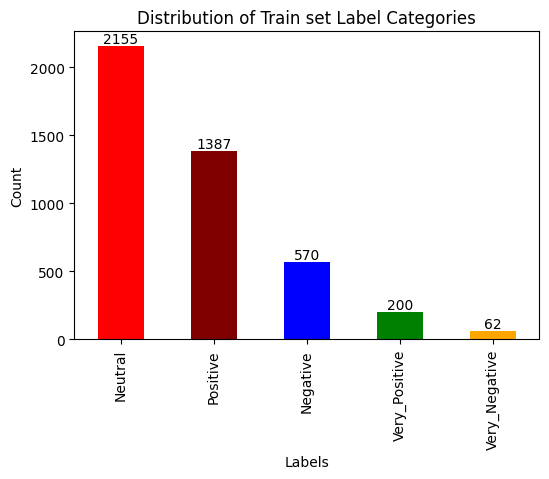

In [299]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(train))
label_counts = train['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Train set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [300]:
# Calculate class counts
class_counts = train['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Neutral: Count: 2155, Percentage Contribution: 49.27%
Class Positive: Count: 1387, Percentage Contribution: 31.71%
Class Negative: Count: 570, Percentage Contribution: 13.03%
Class Very_Positive: Count: 200, Percentage Contribution: 4.57%
Class Very_Negative: Count: 62, Percentage Contribution: 1.42%


In [301]:
train.to_csv("HSP_Train_Data_with_Encoded_Label_Multi_3.0.csv",index=False)

#### Analysis on Validation Datasets

Total Count of Samples =  938


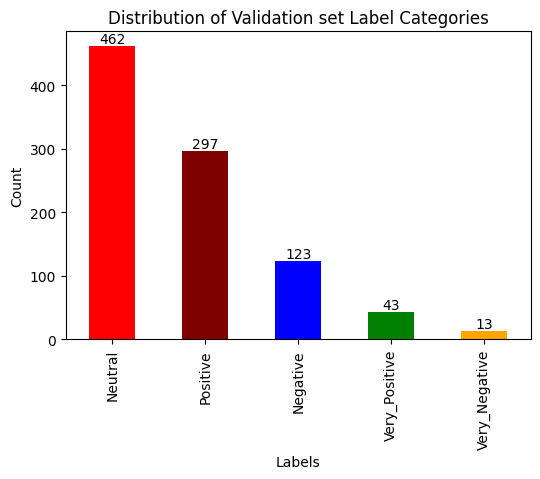

In [302]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(val))
label_counts = val['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Validation set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [303]:
# Calculate class counts
class_counts = val['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Neutral: Count: 462, Percentage Contribution: 49.25%
Class Positive: Count: 297, Percentage Contribution: 31.66%
Class Negative: Count: 123, Percentage Contribution: 13.11%
Class Very_Positive: Count: 43, Percentage Contribution: 4.58%
Class Very_Negative: Count: 13, Percentage Contribution: 1.39%


In [304]:
val.to_csv("HSP_Val_Data_with_Encoded_Label_Multi_3.0.csv",index=False)

#### Analysis on Test Datasets

Total Count of Samples =  938


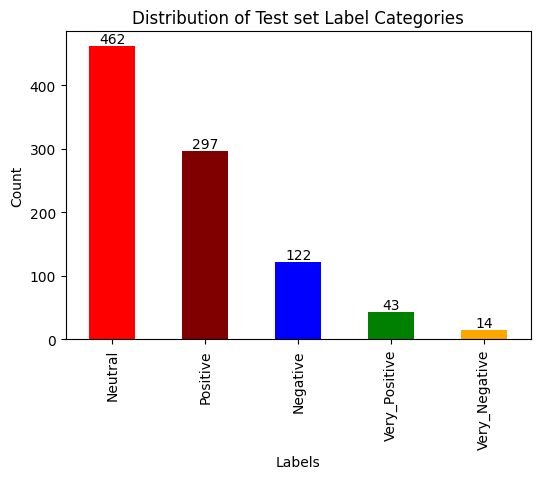

In [305]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(test))
label_counts = test['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['red', 'maroon', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Test set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [306]:
# Calculate class counts
class_counts = test['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Neutral: Count: 462, Percentage Contribution: 49.25%
Class Positive: Count: 297, Percentage Contribution: 31.66%
Class Negative: Count: 122, Percentage Contribution: 13.01%
Class Very_Positive: Count: 43, Percentage Contribution: 4.58%
Class Very_Negative: Count: 14, Percentage Contribution: 1.49%


In [307]:
test.to_csv("HSP_Test_Data_with_Encoded_Label_Multi_3.0.csv",index=False)

### Generation of Train,Validation and Test Set for Binary Class Classification using Stratified Sampling

In [308]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
data = pd.read_csv('final_labels_bin_3.0.csv')

# Shuffle the data
data_shuffled = data.sample(frac=1, random_state=42)

# Perform stratified sampling
train_val, test = train_test_split(data_shuffled, test_size=0.15, random_state=42, stratify=data_shuffled['Label'])
train, val = train_test_split(train_val, test_size=0.15/0.85, random_state=42, stratify=train_val['Label'])

# Display the shapes of the sets
print("Training Set shape:", train.shape)
print("Validation Set shape:", val.shape)
print("Testing Set shape:", test.shape)

Training Set shape: (4374, 5)
Validation Set shape: (938, 5)
Testing Set shape: (938, 5)


#### Analysis on Train Datasets

Total Count of Samples =  4374


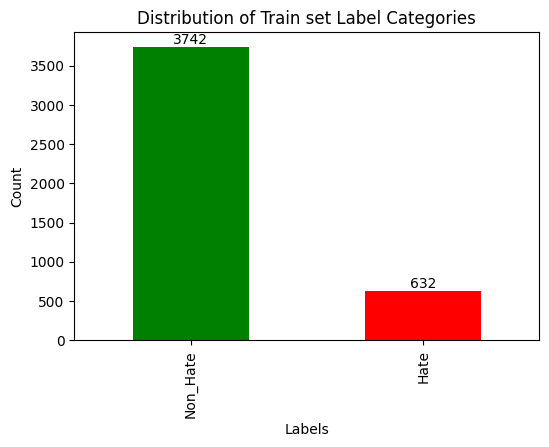

In [310]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(train))
label_counts = train['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['green', 'red']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Train set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [311]:
# Calculate class counts
class_counts = train['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Non_Hate: Count: 3742, Percentage Contribution: 85.55%
Class Hate: Count: 632, Percentage Contribution: 14.45%


In [312]:
train.to_csv("HSP_Train_Data_with_Encoded_Label_Bin_3.0.csv",index=False)

#### Analysis on Validation Datasets

Total Count of Samples =  938


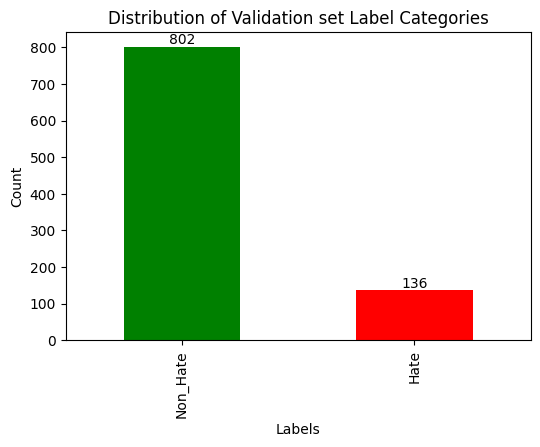

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(val))
label_counts = val['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['green', 'red']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Validation set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [314]:
# Calculate class counts
class_counts = val['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Non_Hate: Count: 802, Percentage Contribution: 85.50%
Class Hate: Count: 136, Percentage Contribution: 14.50%


In [315]:
val.to_csv("HSP_Val_Data_with_Encoded_Label_Bin_3.0.csv",index=False)

#### Analysis on Test Datasets

Total Count of Samples =  938


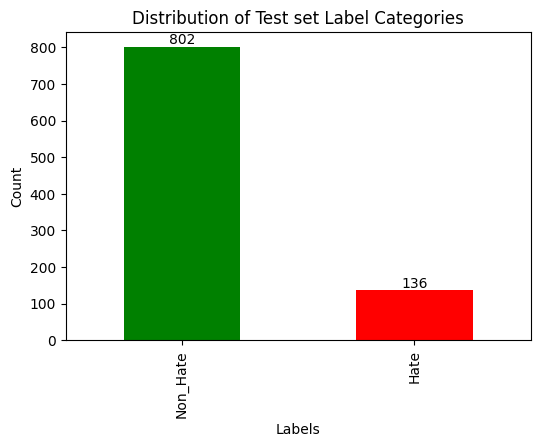

In [316]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualization of Class Labels Taining data
#df=pd.read_csv('final_labels_2.0.csv')

print("Total Count of Samples = ", len(test))
label_counts = test['Label'].value_counts()

# Updated colors list to include 6 colors for 6 classes
colors = ['green', 'red']

plt.figure(figsize=(6, 4))
ax = label_counts.plot(kind='bar', color=colors)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Test set Label Categories')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [317]:
# Calculate class counts
class_counts = test['Label'].value_counts()

# Calculate total number of samples
total_samples = class_counts.sum()

# Calculate percentage contribution for each class
percentage_contribution = (class_counts / total_samples) * 100

# Display counts and percentage contribution for each class
for label, count in class_counts.items():
    percentage = percentage_contribution[label]
    print(f"Class {label}: Count: {count}, Percentage Contribution: {percentage:.2f}%")

Class Non_Hate: Count: 802, Percentage Contribution: 85.50%
Class Hate: Count: 136, Percentage Contribution: 14.50%


In [318]:
test.to_csv("HSP_Test_Data_with_Encoded_Label_Bin_3.0.csv",index=False)